# 442 Giriş Dersi

In [10]:
import numpy as np
from ROOT import TCanvas, TGraphErrors, TF1
from ROOT import gROOT
from array import array

In [16]:
ndata = 9

y  =  array( 'f', [ 0, 0, 0, 691, 701, 724, 761, 737, 767, ])
x  =  array( 'f', [ 300, 320, 340, 360, 380, 400, 420, 440, 460, ])
sy =  array( 'f', [ 1, 1, 1, 26, 26, 26, 27, 27, 27, ])
sx =  array( 'f', [ 0, 0, 0, 0, 0, 0, 0, 0, 0, ])

weight = 0
totw = 0 # Total weight
xybar = 0; xbar = 0; ybar = 0; x2bar = 0 # weighted averages

In [17]:
for i in range(ndata):
    weight = 1./(sy[i]*sy[i])
    totw += weight
    xybar += (x[i]*y[i]*weight)
    xbar += (x[i]*weight)
    ybar += (y[i]*weight)
    x2bar += (x[i]*x[i]*weight)

xybar /= totw
xbar /= totw
ybar /= totw
x2bar /= totw

In [18]:
sy2bar = ndata / totw # weighted average error squared
slope = (xybar - xbar*ybar) / (x2bar - xbar*xbar)
itcpt = ybar - slope * xbar
slopeerr = np.sqrt( sy2bar / (ndata * (x2bar - xbar*xbar) ) )
itcpterr = np.sqrt( x2bar ) * slopeerr

print("slope of fit line = {} +- {}".format(slope, slopeerr))
print("intercept of fit line = {} +- {}".format(itcpt, itcpterr))


slope of fit line = 0.638549791111 +- 0.0337613575143
intercept of fit line = -202.42411311 +- 10.8275240852


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


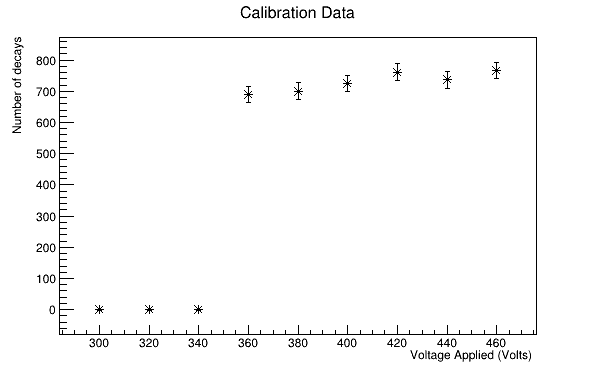

In [20]:
c1 = TCanvas( 'c1', 'A Simple Graph with error bars', 200, 10, 600, 400 )
             
mygraph = TGraphErrors(ndata,x,y,sx,sy)
mygraph.Draw("A*")
mygraph.SetTitle("Calibration Data")
mygraph.GetYaxis().SetTitle("Number of decays")
mygraph.GetXaxis ().SetTitle ("Voltage Applied (Volts) ")

c1.Draw()

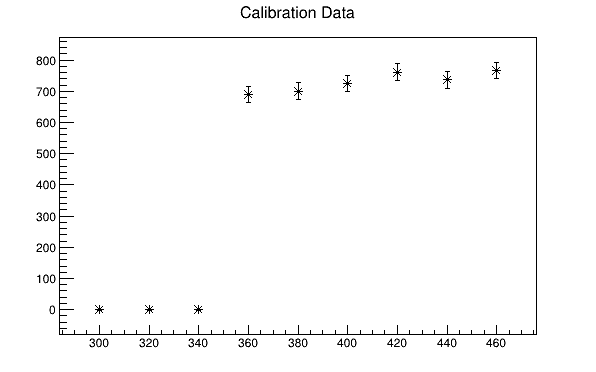

In [15]:
ffitline = TF1("ffitline","[0]*x+[1]",0,6)
ffitline.SetParameter(0,slope)
ffitline.SetParameter(1,itcpt)
ffitline.SetLineColor(4) # draw in blue color
ffitline.SetLineStyle(2) # draw dotted line
ffitline.Draw("same")
c1.Draw()

In [ ]:
fnew = TF1("fnew","[0]*x+[1]",0,6)
fnew.SetParameters(3.1416,2.7182) # arbitrary starting parameters
mygraph.Fit(fnew)
fnew.Draw("same")
c1.Draw()